In [84]:
import harp
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from functools import reduce
import utils
import numpy as np
from pathlib import Path

harp_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)
session_data_reader = utils.SessionData()

#harp_datafolder = r'C:/temp/2024-05-10T13-57-39/HarpDataH1/'
#harp_datafolder = Path('/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/training_day5/2024-08-05T15-27-29_B3M2')
#settings_datafolder = Path('/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/training_day5/2024-08-05T15-27-29_B3M2/SessionSettings/')

harp_datafolder = Path('/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/MMclosed&Regular_120824/2024-08-12T16-51-16_B3M3')
settings_datafolder = harp_datafolder/'SessionSettings/'

In [85]:
# read experiment metadata
session_settings = utils.load_json(session_data_reader, settings_datafolder)

print(session_settings)

                                                                     metadata
1904-01-14 04:25:04.340256  {'motorSettings': {'nominalPulseInterval': 200...


                            OpticalTrackingRead0X  OpticalTrackingRead0Y  \
Time                                                                       
1904-01-14 04:25:04.340256                     -6                      9   
1904-01-14 04:25:04.350240                      6                     11   
1904-01-14 04:25:04.360256                     13                      6   
1904-01-14 04:25:04.370240                     16                      1   
1904-01-14 04:25:04.380256                     13                     -2   
...                                           ...                    ...   
1904-01-14 04:57:56.600256                    209                     13   
1904-01-14 04:57:56.610240                    215                     17   
1904-01-14 04:57:56.620256                    220                     14   
1904-01-14 04:57:56.630240                    220                      8   
1904-01-14 04:57:56.640256                    216                      0   

           

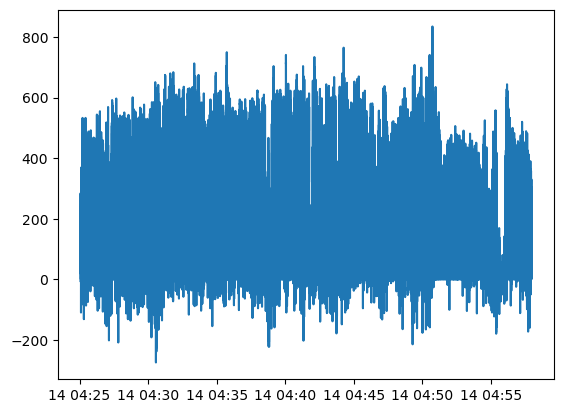

In [86]:
# read harp stream
flow_sensor = utils.load(harp_reader.OpticalTrackingRead, harp_datafolder / 'HarpDataH1')
print(flow_sensor)

plt.figure()
plt.plot(flow_sensor['OpticalTrackingRead0X'])

In [87]:
# Convert to a playback file
output_data = np.asarray(flow_sensor['OpticalTrackingRead0X'], dtype=np.int16)

flow_sensor['OpticalTrackingRead0X'].to_csv('playback_file_B3M3_MMreg.csv', header=False, sep=',', lineterminator='\n')
